# Logistic Regression ML - 2

Hello there. In last we practiced `Linear Regression` and we learned alot. Now I learned alot about logistic regression, splitting dataset for training & testing, scaling features, imputing, evaluating, and alot more. Now In this notebook, I will practice all those things I had learned.

As last time, I will be mentioning all the notebooks I referred, Dataset I had used and explain each step and code.

## Problem Faced
- You are given a dataset and asked to build a model that predicts wheather the person has heart-disease or not. Now we also have the correct answer in the dataset for evalution

## Dataset Used
- [Heart Disease Dataset](https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression)

## Notebook Used
- [Kaggle Notebook](https://www.kaggle.com/code/besenturk/logistic-regression-to-predict-heart-disease)
- [Jovian Notebook](https://jovian.ai/premkumar/python-sklearn-logistic-regression-6fe04#C247)

## Steps
- Data Preparating
- Exploratory Analysis & Visualization
- Imputing Missing values
- Scaling Features (if possible)
- OneHot Encoder (if possible)
- Splitting Dataset
- Training the model & Evaluation
- Conclusion

## Ideas to do
- Saving Dataset
- Saving Model


# Step - 1 Data Preparation

First let's import neccessary libraries and we can load dataset into pandas

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [2]:
raw_df = pd.read_csv('../input/heart-disease-prediction-using-logistic-regression/framingham.csv')
raw_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


# Step - 2 Exploratory Analysis & Visualization

Now that we imported neccessary libraries and loaded the dataset. we will proceed with analysis and visualization.

In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


We have `4238 rows` and `16 cols`, since we have only less cols and rows - It's easy to train the model. It's important to notice that datasets contains only floats and ints. So there is no need to use `One Hot Encoder`

Let's analysis more

In [4]:
raw_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Look's like we got a problem. It's ok.

We can solve this

In [5]:
raw_df.describe(include='all')

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


We got all the information we need.

Now it's time for some visualization. First Let's figure out the names of the columns

In [6]:
raw_df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

First Let's check the correlation of each column

In [7]:
fig = px.imshow(raw_df.corr().sort_values(by='TenYearCHD'), text_auto=True, title='Heatmap of Correlation')
fig.show()

`age` Column has more correlation with `TenYearCHD`. That means Heart disease various from age to age

In [8]:
px.histogram(raw_df, x='age', color='male', title='Histogram of Age column')

We take male if `male == 1` and female if `male == 0`. Then with above chart we can able to see that males are fewer than females

Next let's try with `education`

In [9]:
raw_df['education'].value_counts()

1.0    1720
2.0    1253
3.0     687
4.0     473
Name: education, dtype: int64

In [10]:
fig = px.histogram(raw_df, x='education', nbins=4)
fig.update_layout(bargap=0.1, title='Histogram of Education Column')
fig.show()

If you look closly we can take that education is mostly upto 1st grade. This makes the statement that people in this dataset is not well-educated

In [11]:
px.histogram(raw_df, 'currentSmoker', color='currentSmoker', nbins=4)

Looks like not smoking people is more than smoking people. That's maybe or maynot be true. The truth will know only to the person that creates this dataset

# Step - 3 Imputing Missing Values

Our model cannot be perfect if we input a dataset with missing values. There can be two things we can do here

1. Dropping all the `Unknow or NaN or null` values. If the `NaN` values is smaller in size, we can easily drop. That won't create a big problem. But what if the `NaN` values is greater is size

2. Second Method is filling the values with respective to their mean.

First Let's check the size of Missing values

In [12]:
raw_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

We can drop these `NaN` values if want. But am going to use this. I will fill these values with their mean of upper and lower row.

Since every column in `numeric`, we can easily use `sklearn's SimpleImputer` Function for filling null valuesfrom sklearn.impute import SimpleImputer

In this we must take all the numeric cols and make a list out of it first

In [13]:
numeric_cols = raw_df.select_dtypes(include=np.number).columns.tolist()

In [14]:
numeric_cols

['male',
 'age',
 'education',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

We got all the numeric cols and next is to use the `SimpleImputer` Function to fill the `NaN` values

In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')

We are using a mean strategy. It's because we can use the NaN value's upper and lower columns and values and find the mean out of it

By fitting the values. Imputer find the best mean for each rows

In [16]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

In [17]:
list(imputer.statistics_)

[0.42921189240207647,
 49.58494572911751,
 1.9789499153157513,
 0.49410099103350635,
 9.003088619624615,
 0.02962962962962963,
 0.005899008966493629,
 0.31052383199622463,
 0.025719679093912224,
 236.72158548233045,
 132.35240679565834,
 82.89346389806512,
 25.80200758473572,
 75.87892376681614,
 81.96675324675324,
 0.1519584709768759]

Next step is to transform all the Null values to mean values

In [18]:
raw_df[numeric_cols] = imputer.transform(raw_df[numeric_cols])

In [19]:
raw_df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

as you can see, we have no `Null` values. Now it's easier to train the model

# Step 4 - Scaling Features

Now in this step, Dataset have values from so many ranges. We must scale those ranges into certain range. Now This step has to done very carefully. Because this determines the model's value. For this step we will use `sklearn's MinMaxScaler`

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [21]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [22]:
raw_df[numeric_cols] = scaler.transform(raw_df[numeric_cols])

In [23]:
raw_df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.00000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,0.462762,0.326317,0.494101,0.128616,0.02963,0.005899,0.310524,0.025720,0.220240,0.230981,0.369243,0.248716,0.322009,0.118550,0.151958
std,0.495022,0.225583,0.335692,0.500024,0.169703,0.16852,0.076587,0.462763,0.158316,0.075257,0.104199,0.126041,0.098666,0.121466,0.064510,0.359023
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.263158,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.168081,0.158392,0.285714,0.182744,0.242424,0.090395,0.000000
50%,0.000000,0.447368,0.333333,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.215620,0.210402,0.359788,0.239215,0.313131,0.112994,0.000000
75%,1.000000,0.631579,0.666667,1.000000,0.285714,0.00000,0.000000,1.000000,0.000000,0.263158,0.286052,0.443122,0.302896,0.393939,0.127119,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now You can see the max value is `1` and the min value i `0`. 

# Step - 5 Splitting the Dataset

Now we need seperate dataset for training, validating, testing dataset. We must do this because model can identify each value correctly if we give full dataset. It's like giving the answers with questions. We must split the dataset for testing and validating. That way we can test our model's true potential

In [24]:
from sklearn.model_selection import train_test_split
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

Now we have three seperate datasets for validation, training and testing. We have evaluate our model's true potential now

# Step - 6 Traning and Evaluating Model

This is the most awaited step, We clean the dataset, exploring and visualizing, splitting the dataset, optimizing ranges for this one step. We have our model frist with `train_df` and next we use `val_df` and `test_df`.

For training we use `sklearn's LogisticRegression`




In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')

First Let's split what is inputs and what is targets. For us expect last column all is our inputs and our columns is target. We compare our perdictions with that targets.

In [26]:
valid_col = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']

In [27]:
target_col = 'TenYearCHD'

In [28]:
model.fit(train_df[valid_col], train_df[target_col])

LogisticRegression(solver='liblinear')

In [29]:
print(model.coef_.tolist())

[[0.345872282510524, 2.07869947410466, -0.044310652579349, -0.07006324433061073, 1.566751237516833, 0.6368011896207589, 0.7795400046526981, 0.32970836035294954, 0.6369411297679218, 0.578565017879698, 1.8705430830628205, 0.2283938207020694, -0.3262201185129823, -0.3385225839969218, 1.313208234367347]]


In [30]:
print(model.intercept_)

[-3.89099158]


Now that we trained our model with `liblinear` solver and `LogisticRegression` class. Now it's time for evaluating our model.

In [31]:
X_train = train_df[valid_col]
X_val = val_df[valid_col]
X_test = test_df[valid_col]

In [32]:
train_preds = model.predict(X_train)

In [33]:
train_preds

array([0., 0., 0., ..., 0., 0., 0.])

In [34]:
train_df[target_col]

1489    0.0
1368    0.0
2761    0.0
741     0.0
2418    0.0
       ... 
1962    0.0
2643    0.0
2689    0.0
212     0.0
3369    1.0
Name: TenYearCHD, Length: 2542, dtype: float64

In [35]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.90947884, 0.09052116],
       [0.83834028, 0.16165972],
       [0.95049625, 0.04950375],
       ...,
       [0.94716474, 0.05283526],
       [0.64386573, 0.35613427],
       [0.60685307, 0.39314693]])

In [36]:
model.classes_ 

array([0., 1.])

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(train_df[target_col], train_preds)

0.8544453186467349

Yes our model's score is `0.85` Better than nothing. We will use our validation's set and testing's set for more accurate score later. But let's analyse why does our model get 0.85 for that we could use `confusion matrix` It's one of best `sklearn's` feature. I would love to use it because I will come to know where does our model lagging

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_df[target_col], train_preds, normalize='true')

array([[0.997208  , 0.002792  ],
       [0.92620865, 0.07379135]])

Let's plot above matrix

In [39]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure(figsize=(12, 10))
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 85.44%


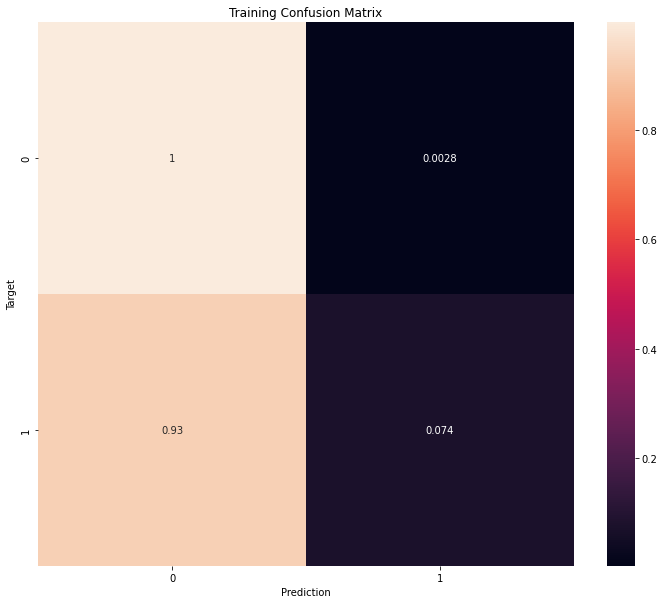

In [40]:
predict_and_plot(X_train, train_df[target_col], 'Training');

Yes. we did for our Training set. Let's continue for our validation set and testing set. With our training set we get `85%` of accuracy.

Accuracy: 84.55%


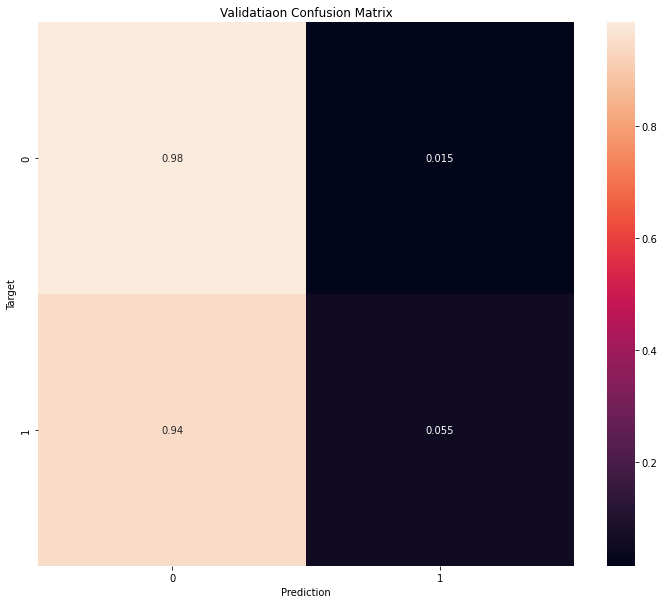

In [41]:
predict_and_plot(X_val, val_df[target_col], 'Validatiaon');

With our validation set we get `84%` accuracy. Not bad.

Accuracy: 85.61%


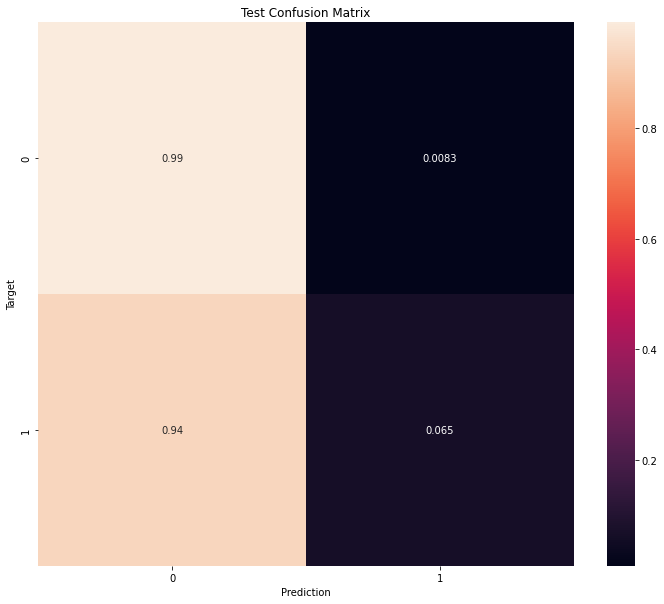

In [42]:

predict_and_plot(X_test, test_df[target_col], 'Test');

# Step - 6 Conclusion

We get `85%` of accuracy on testing set. Our model Just stays on `80 - 85` range whatever the dataset we provide. That means our model's predictions is good. 

Is it enough ?

Not at all. We must optimize our model and our get better results than this. For now I will just leave it off and learn more. So that I can optimize our model to it's extent.

### **Bye 👋👋**